# UFC Sourcing & Analyzing Time-Series Data

## List of Contents:
## 01. Importing Libraries
## 02. Importing Data
## 03. Preparing Data for Analysis
## 04. Decomposition
## 05. Initial Stationarity Test
## 06. Stationarizing Data
## 07. Checking Autocorrelations

## --

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
#Option to display charts without call
%matplotlib inline

In [3]:
#To view all columns of dataset at once
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

## 02. Importing Data

In [4]:
#Defining path for data import
path = r'C:\Users\Mosspants\Desktop\CareerFoundry\A6_Advanced Analytics & Dashboard Design\UFC_Project'

In [5]:
#Importing data
df_ufc = pd.read_csv(os.path.join(path, '02_Data', 'Original_Data', 'raw_total_fight_data.csv'), index_col=False, sep=';')

In [6]:
#Checking import
df_ufc.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,0 of 0,0 of 1,---,0%,0,0,0,0,0:03,0:00,32 of 83,14 of 40,8 of 19,5 of 7,1 of 1,4 of 4,41 of 102,23 of 51,0 of 0,0 of 0,0 of 1,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,1 of 2,1 of 3,50%,33%,1,2,0,1,1:15,4:15,22 of 51,10 of 37,4 of 4,7 of 14,1 of 2,15 of 16,15 of 42,28 of 59,4 of 5,3 of 6,8 of 10,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,0 of 0,0 of 0,---,---,0,0,0,0,0:10,0:00,10 of 14,1 of 5,0 of 0,0 of 0,4 of 4,1 of 1,9 of 10,2 of 6,0 of 0,0 of 0,5 of 8,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,0 of 0,4 of 5,---,80%,0,2,3,1,1:04,9:53,26 of 60,10 of 35,5 of 5,0 of 1,0 of 0,5 of 5,26 of 56,15 of 41,2 of 2,0 of 0,3 of 7,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,2 of 4,1 of 1,50%,100%,0,0,0,1,2:15,3:48,14 of 40,29 of 110,7 of 13,15 of 20,9 of 10,7 of 8,25 of 54,36 of 119,5 of 9,13 of 15,0 of 0,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson


In [7]:
df_ufc.shape

(6012, 41)

### I realized that using the prepared data set to total up the number of doctor stoppage wins from the previous 6.5 script was incorrect. That data lists doctor stoppages as the total number of times that has happened in a fighter's career, so adding them was inflating the numbers. 
### I want to look at doctor stoppages for this analysis, and that means using the raw data where each fight's win is notated by the type of win (ko, submission, doctor stoppage, etc.)

## 03. Preparing Data for Analysis

### Cleaning data:

In [8]:
#Checking for missing data
df_ufc.isnull().sum()

R_fighter            0
B_fighter            0
R_KD                 0
B_KD                 0
R_SIG_STR.           0
B_SIG_STR.           0
R_SIG_STR_pct        0
B_SIG_STR_pct        0
R_TOTAL_STR.         0
B_TOTAL_STR.         0
R_TD                 0
B_TD                 0
R_TD_pct             0
B_TD_pct             0
R_SUB_ATT            0
B_SUB_ATT            0
R_REV                0
B_REV                0
R_CTRL               0
B_CTRL               0
R_HEAD               0
B_HEAD               0
R_BODY               0
B_BODY               0
R_LEG                0
B_LEG                0
R_DISTANCE           0
B_DISTANCE           0
R_CLINCH             0
B_CLINCH             0
R_GROUND             0
B_GROUND             0
win_by               0
last_round           0
last_round_time      0
Format               0
Referee             32
date                 0
location             0
Fight_type           0
Winner             110
dtype: int64

### We will be looking at win_by and date, so I will not remove the missing Referee data. It is not a column we will be using. The same can be said for the Winner column.

In [9]:
#Checking for duplicates
df_dups = df_ufc[df_ufc.duplicated()]
df_dups

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner


### There are no duplicates in the data.

In [10]:
#Looking at counts of win_by
df_ufc['win_by'].value_counts(dropna = False)

win_by
Decision - Unanimous       2097
KO/TKO                     1905
Submission                 1211
Decision - Split            568
TKO - Doctor's Stoppage      80
Decision - Majority          66
Overturned                   48
DQ                           18
Could Not Continue           17
Other                         2
Name: count, dtype: int64

### There are actually not that many wins by doctor's stoppage. I'm not sure that would work for a time-series. Instead I will use the KO/TKO wins. Knockouts are rarer than the judges deciding unanious wins and also something that can lead to more serious injuries.

### The date will need to be formatted for the analysis. I have also previously removed values before the year 2000. I will take a look a the data to see if this is still needed.

### Data wrangling:

In [11]:
#Looking at date datatype
df_ufc['date'].dtype

dtype('O')

In [12]:
#Changing format of date to datetime
df_ufc['date'] = pd.to_datetime(df_ufc['date'])

In [13]:
#Checking change
df_ufc['date'].head()

0   2021-03-20
1   2021-03-20
2   2021-03-20
3   2021-03-20
4   2021-03-20
Name: date, dtype: datetime64[ns]

### I'm sure there are other ways to accomplish this, but what I will do is split the date into columns that act as day, month, and year flags to group the data. Then we can see how many matches took place in each year.

In [14]:
#Creating Day, Month, and Year columns from date
df_ufc['Day'] =pd.DatetimeIndex(df_ufc['date']).day
df_ufc['Month'] =pd.DatetimeIndex(df_ufc['date']).month
df_ufc['Year'] =pd.DatetimeIndex(df_ufc['date']).year

In [15]:
df_ufc.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,Day,Month,Year
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,0 of 0,0 of 1,---,0%,0,0,0,0,0:03,0:00,32 of 83,14 of 40,8 of 19,5 of 7,1 of 1,4 of 4,41 of 102,23 of 51,0 of 0,0 of 0,0 of 1,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez,20,3,2021
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,1 of 2,1 of 3,50%,33%,1,2,0,1,1:15,4:15,22 of 51,10 of 37,4 of 4,7 of 14,1 of 2,15 of 16,15 of 42,28 of 59,4 of 5,3 of 6,8 of 10,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles,20,3,2021
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,0 of 0,0 of 0,---,---,0,0,0,0,0:10,0:00,10 of 14,1 of 5,0 of 0,0 of 0,4 of 4,1 of 1,9 of 10,2 of 6,0 of 0,0 of 0,5 of 8,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa,20,3,2021
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,0 of 0,4 of 5,---,80%,0,2,3,1,1:04,9:53,26 of 60,10 of 35,5 of 5,0 of 1,0 of 0,5 of 5,26 of 56,15 of 41,2 of 2,0 of 0,3 of 7,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo,20,3,2021
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,2 of 4,1 of 1,50%,100%,0,0,0,1,2:15,3:48,14 of 40,29 of 110,7 of 13,15 of 20,9 of 10,7 of 8,25 of 54,36 of 119,5 of 9,13 of 15,0 of 0,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson,20,3,2021


In [16]:
#Looking at count of year
df_ufc['Year'].value_counts(dropna = False).sort_index()

Year
1994     29
1995     34
1996     36
1997     39
1998     21
1999     44
2000     43
2001     40
2002     53
2003     41
2004     39
2005     80
2006    158
2007    171
2008    201
2009    215
2010    253
2011    300
2012    341
2013    386
2014    503
2015    473
2016    493
2017    457
2018    474
2019    516
2020    456
2021    116
Name: count, dtype: int64

In [17]:
#Creating subset of wins by KO/TKO
df_ko = df_ufc[df_ufc['win_by'] == 'KO/TKO']

In [18]:
df_ko.shape

(1905, 44)

In [19]:
#Count of wins by KO/TKO by year
df_ko['Year'].value_counts(dropna = False).sort_index()

Year
1994     10
1995     10
1996     19
1997     12
1998      7
1999     21
2000     12
2001     17
2002     26
2003     16
2004     16
2005     32
2006     56
2007     51
2008     86
2009     71
2010     65
2011     92
2012    101
2013    126
2014    147
2015    149
2016    151
2017    143
2018    149
2019    148
2020    134
2021     38
Name: count, dtype: int64

### UFC started in 1993, so it makes sense that there aren't that many matches per year. In 2001 ownership and structure changed, but the amount of fights didn't take off until 2006. Knockouts do seem somewhat related to the number of matches, which would make sense. More matches equals more chances to get a knockout. 
### Data from 2021 is also not complete, because our data runs up to March of that year.
###  What might be better is to use number of fights for the time-series analysis. That way it isn't tied to another variable in the data, the way knockout victories might be tied to number of matches.
### The data will need to be smoothed as well. I'm thinking that grouping the fights by quarter will help with this.
### I will make a subset of the data with the date and count of fights. Then export it to Excel to perform a quarterly moving average. I will focus on data from 2006-2020, removing the older data and those from 2021 that don't have the full year. These earlier years are also influenced by the factor that it's the beginning of UFC.

### Subsetting:

In [20]:
#Creating subset of date, day, month, and year

In [21]:
df_date = df_ufc.filter(['date', 'Day', 'Month', 'Year'], axis = 1)

In [22]:
#Checking subset
df_date.head()

,date,Day,Month,Year
0,2021-03-20,20,3,2021
1,2021-03-20,20,3,2021
2,2021-03-20,20,3,2021
3,2021-03-20,20,3,2021
4,2021-03-20,20,3,2021


In [23]:
df_date.shape

(6012, 4)

In [24]:
#Creating new subset with matches before 2006 or after 2020
df_date2 = df_date.loc[(df_date['Year'] >= 2006) & (df_date['Year'] < 2021)]

In [25]:
#Checking new subset
df_date2.head()

,date,Day,Month,Year
116,2020-12-19,19,12,2020
117,2020-12-19,19,12,2020
118,2020-12-19,19,12,2020
119,2020-12-19,19,12,2020
120,2020-12-19,19,12,2020


In [26]:
df_date2.shape

(5397, 4)

In [27]:
#Creating object with counts of matches per date
date_count = df_date2.value_counts(dropna = False).sort_index()
date_count

date        Day  Month  Year
2006-01-16  16   1      2006     8
2006-02-04  4    2      2006     9
2006-03-04  4    3      2006     8
2006-04-06  6    4      2006     9
2006-04-15  15   4      2006     9
                                ..
2020-11-21  21   11     2020    12
2020-11-28  28   11     2020    10
2020-12-05  5    12     2020     8
2020-12-12  12   12     2020    10
2020-12-19  19   12     2020    12
Name: count, Length: 476, dtype: int64

In [28]:
#Exporting object with counts of matches per date
date_count.to_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'time_series_sub.csv'))

In [29]:
#Importing quarterly moving average data
df_qt = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'time_series_sub_clean.csv'), index_col=False)

In [30]:
#Checking import
df_qt.head()

,Date,Average
0,1/1/2006,8.333333
1,4/1/2006,9.000000
2,7/1/2006,9.000000
3,10/1/2006,8.666667
4,1/1/2007,8.666667


In [31]:
df_qt.shape

(60, 2)

In [32]:
#Changing date to datetime format and setting it as the index
df_qt['datetime'] = pd.to_datetime(df_qt['Date'])
df_qt = df_qt.set_index('datetime')
df_qt.drop(['Date'], axis=1, inplace=True)
df_qt.head()

,Average
datetime,
2006-01-01,8.333333
2006-04-01,9.000000
2006-07-01,9.000000
2006-10-01,8.666667
2007-01-01,8.666667


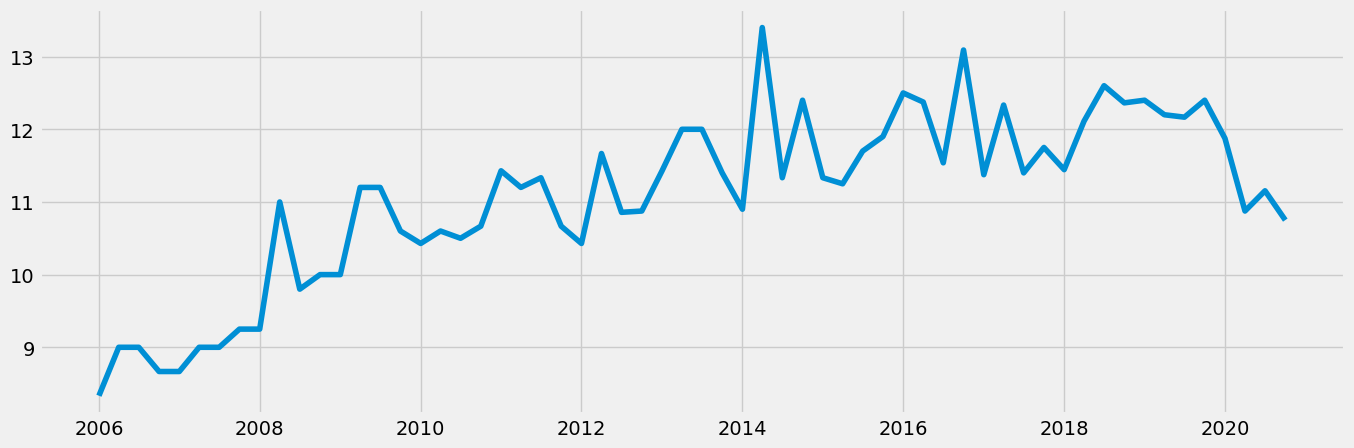

In [33]:
#Ploting data in line chart
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_qt)

In [34]:
#Checking for duplicates
qt_dup = df_qt[df_qt.duplicated()]
qt_dup

,Average
datetime,
2006-07-01,9.000000
2007-01-01,8.666667
2007-04-01,9.000000
2007-07-01,9.000000
2008-01-01,9.250000
2009-01-01,10.000000
2009-07-01,11.200000
2010-04-01,10.600000
2011-04-01,11.200000


### These values are showing as duplicates. While some of the average values are the same, they are for different dates. I will leave these.

In [35]:
#Check for missing values
df_qt.isnull().sum() 

Average    0
dtype: int64

### There are no missing values.

## 04. Decomposition

In [36]:
#Using an additive model
decomposition = sm.tsa.seasonal_decompose(df_qt, model='additive')

In [37]:
#Fixing size of special charts
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

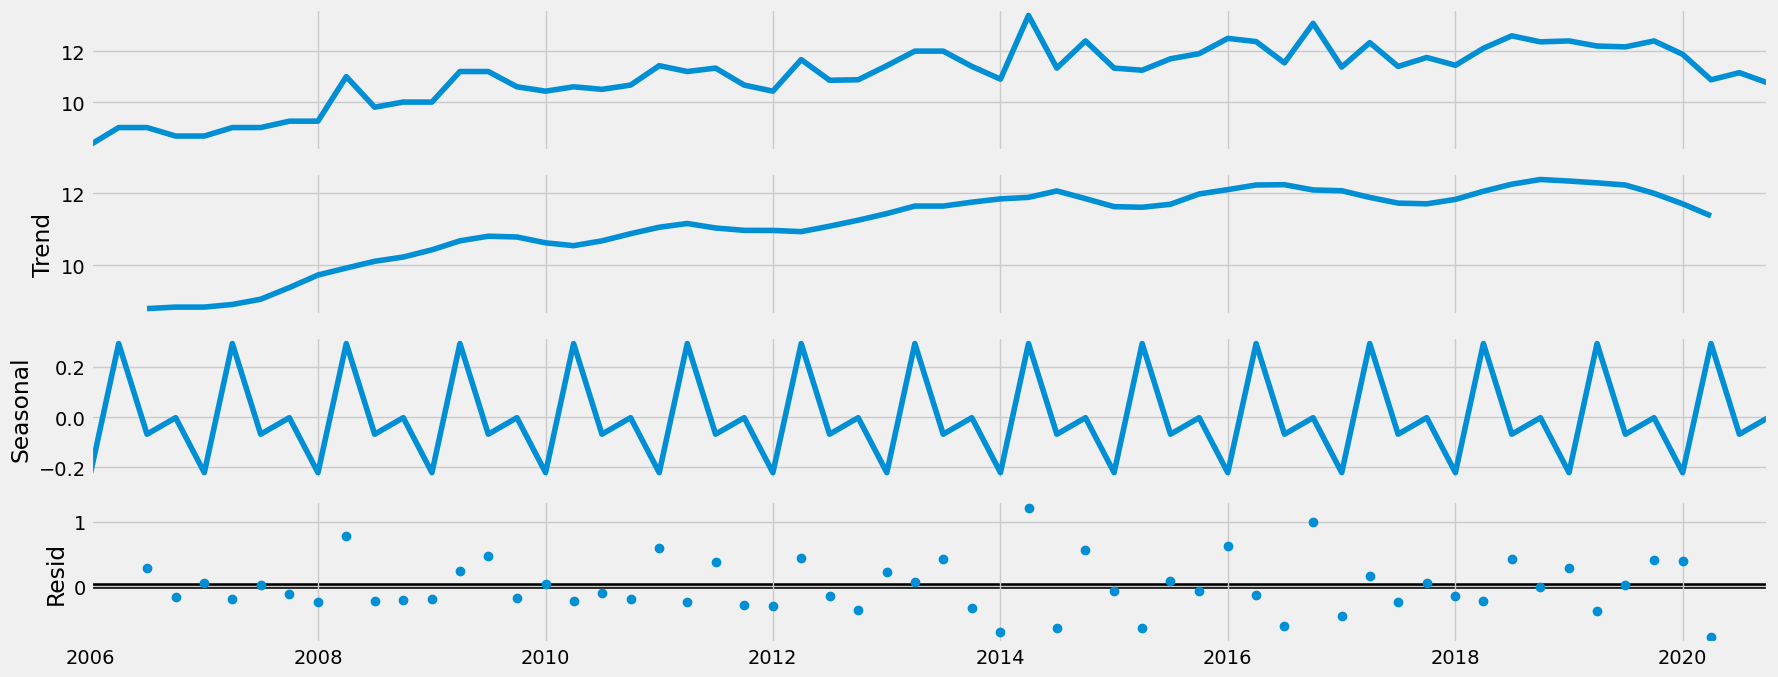

In [38]:
# Visualizing components after decomposition
decomposition.plot()
plt.show()

### It seems like there's still a lot of noise even after the quarterly averaging. I could try to make yearly averages, but then we wouldn't have that many data points. I will try to continue the exercise with this though.
### From this, the data does not appear to be stationary. It seems to have a trend and even some seasonality.

## 05. Initial Stationarity Test

### Null Hypothesis: There is a unit root in the data.
### Alternative Hypothesis: There is no unit root in the data.

In [39]:
#Running Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_qt['Average'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.299893
p-value                         0.172002
Number of Lags Used             1.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


### The p-value is greater than 0.05. TheTest Statistic is also largeer than the 5% Critical Value, -2.299893 compared to -2.912837. 

## 06. Stationarizing Data

In [40]:
#Using differencing to make data stationary
diff = df_qt - df_qt.shift(1)

In [41]:
#Removing missing values
diff.dropna(inplace = True)

In [42]:
diff.head()

,Average
datetime,
2006-04-01,0.666667
2006-07-01,0.000000
2006-10-01,-0.333333
2007-01-01,0.000000
2007-04-01,0.333333


In [43]:
diff.columns

Index(['Average'], dtype='object')

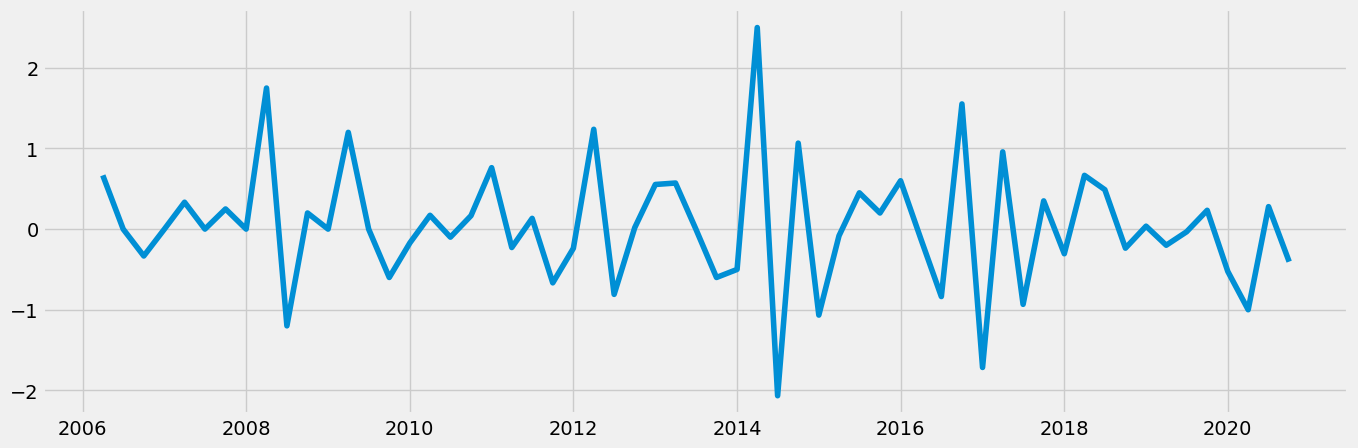

In [44]:
#Plotting new data after differencing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(diff)

In [45]:
#Running Dickey-Fuller test
dickey_fuller(diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.398656e+01
p-value                        4.087355e-26
Number of Lags Used            0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


### The p-value is now less than 0.05, being at 4.08 with a negative notation of 26. The Test Statistc of -13.98656 (-1.398656 with one notation) would also be smaller than the 5% Critical Value of -2.912837.

## 07. Checking Autocorrelations

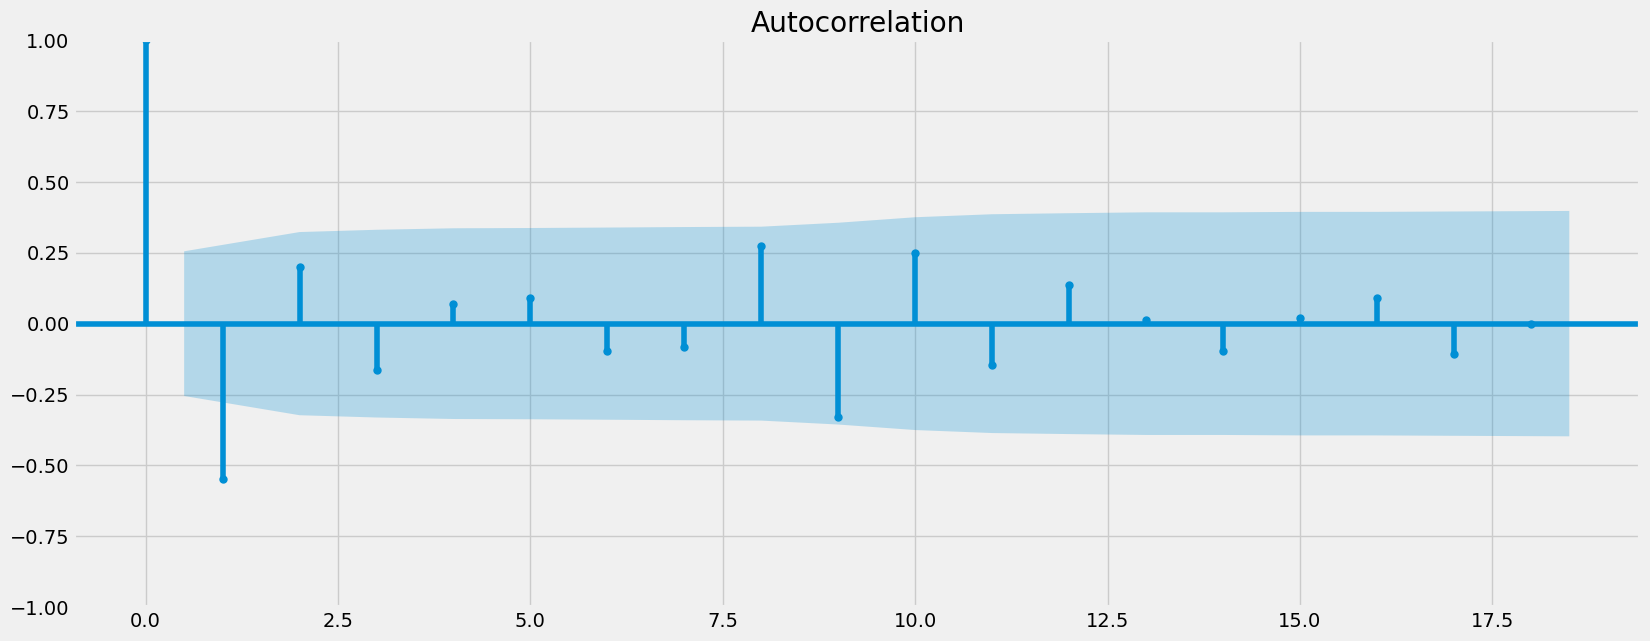

In [46]:
#Plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(diff)
plt.show()

### After the differencing, there appears to be two points outside of the blue area. I did not check the autocorrelation of the data before the differencing, so I will plot that now.

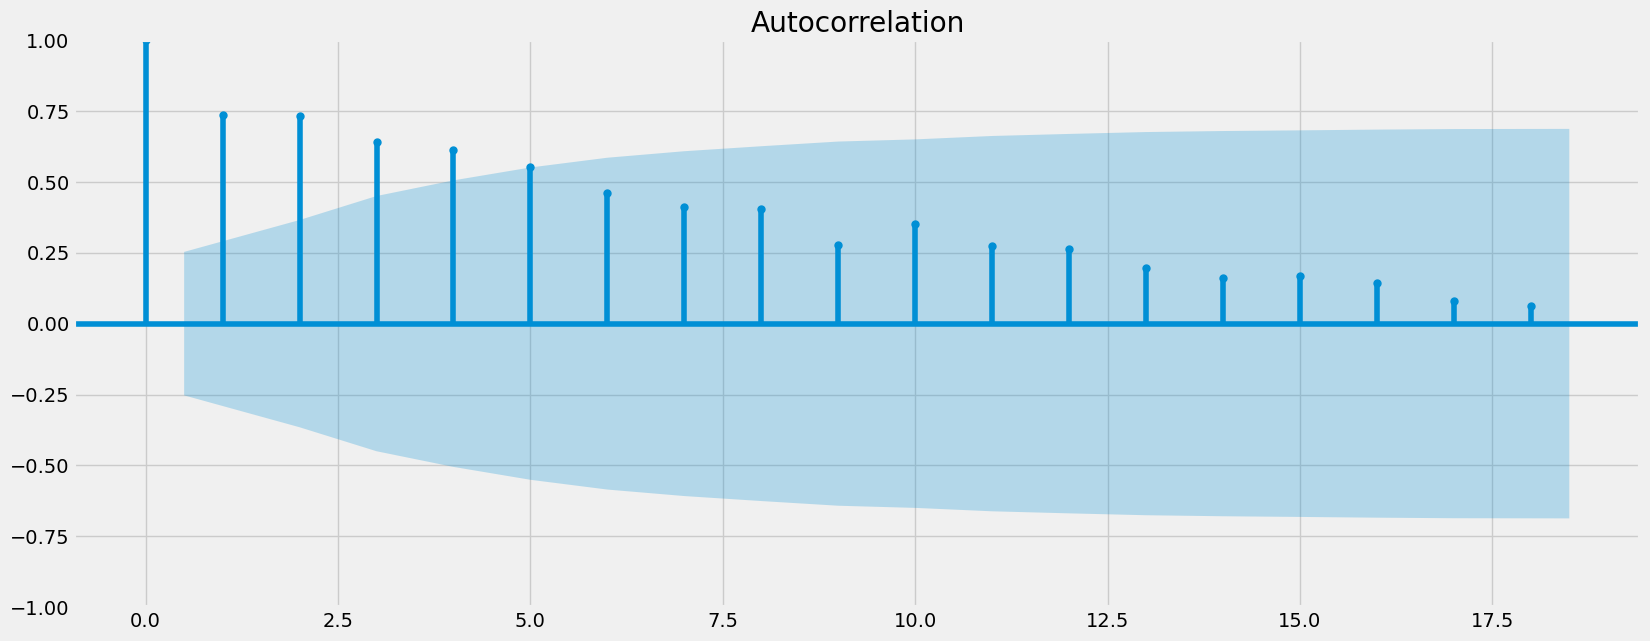

In [47]:
plot_acf(df_qt)
plt.show()

### There were 5 points outside of the blue area of confidence in the data before the differencing. 